In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("DesalData-2018-10-05.csv", encoding = "ISO-8859-1")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,33,43,45,47,56,58,60,62,76,81,83,85,91,92,94,96,102,107,112,119,123,124,125,126,129,130,131,134,135,136,139,140,141,149,155,156,170) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,Capacity (MGD),Capacity (MIGD),Units,Unit size (m3/d),Unit size (MGD),Unit size (MIGD),Award date,Online date,Plant supplier share,Plant supplier 2 share,...,Bid submitted5,Pre qualified4,Pre qualified5,Statement of qualification4,Statement of qualification5,MED Power Consumption,MED Gain Output Ratio,MSF Heat Recovery Stages,MSF Heat Rejection Stages,MSF Gain Output Ratio
count,19271.000000,19271.000000,13952.000000,13924.000000,13924.000000,13924.000000,19078.000000,18822.000000,15446.000000,438.000000,...,0.0,0.0,0.0,0.0,0.0,10.000000,17.000000,27.000000,28.000000,51.000000
mean,1.735867,1.445231,1.822104,1823.889632,0.481966,0.401011,1997.748244,1998.227500,98.174902,50.018767,...,NaN,NaN,NaN,NaN,NaN,3.220000,8.797059,16.259259,2.750000,7.719216
std,8.243873,6.863911,7.309046,6052.168448,1.598976,1.331412,13.582555,13.342122,9.707846,12.818092,...,NaN,NaN,NaN,NaN,NaN,3.462514,2.388807,4.319834,0.440959,1.474850
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1944.000000,1945.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.950000,5.000000,6.000000,2.000000,3.020000
25%,0.070000,0.060000,1.000000,210.000000,0.060000,0.050000,1988.000000,1989.000000,100.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,1.300000,7.100000,13.000000,2.750000,7.000000
50%,0.190000,0.160000,1.000000,500.000000,0.130000,0.110000,2000.000000,2000.000000,100.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,1.350000,8.500000,17.000000,3.000000,8.000000
75%,0.700000,0.580000,2.000000,1363.000000,0.360000,0.300000,2009.000000,2009.000000,100.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,3.175000,11.000000,19.000000,3.000000,8.550000
max,240.210000,200.000000,600.000000,240000.000000,63.410000,52.790000,2025.000000,2025.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,11.000000,13.000000,23.000000,3.000000,12.000000


In [19]:
df[~df["ERD supplier"].isnull()].shape

(824, 177)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19329 entries, 0 to 19328
Columns: 177 entries, Country to MSF Gain Output Ratio
dtypes: float64(46), object(131)
memory usage: 26.1+ MB


In [9]:
for i in df.columns:
    print(i)

Country
Region
Subregion
Location
State/Region
Location type
Project name
Capacity (m3/d)
Size
Capacity (MGD)
Capacity (MIGD)
Units
Unit size (m3/d)
Unit size (MGD)
Unit size (MIGD)
Technical notes
Technology
Thermal design
Thermal equipment
Membrane supplier (RO)
Membrane type (RO)
ERD supplier
ERD type
DAF pretreatment supplier
DAF brand
MF/UF Pretreatment Supplier
MF/UF brand
Other pretreatment
Feedwater
Award date
Online date
Consultant
Consultant 2
Consultant 3
Customer type
Industry
Customer
Plant status
Plant type
Plant supplier
Plant supplier share
Plant supplier 2
Plant supplier 2 share
Plant supplier 3
Plant supplier 3 share
Plant supplier 4
Plant supplier 4 share
Plant supplier 5
Plant supplier 5 share
Procurement model
Concession period
Dev consortium
Developer
Dev share
Developer 2
Dev2 share
Developer 3
Dev3 share
Developer 4
Dev4 share
Developer 5
Dev5 share
Developer 6
Dev6 share
EPC price
Water price (USD/m3)
Last update
Latitude
Longitude
Contact
Feedwater Ph
Feedwate

In [69]:
df["EPC price"][6]

443000000.0

In [161]:
df["EPC price"] = df["EPC price"].apply(lambda x: str(x).replace(" SGD","").replace(" TWD","")
                                        .replace(" USD","").replace(" EUR","").replace(" OMR","").replace(",",""))

In [182]:
df["EPC price"] = df["EPC price"].apply(lambda x: x if x.replace(","") 
                                                                 else str(str(x).replace(",","")).split(" ")[0])

ValueError: could not convert string to float: '443000000 USD'

In [192]:
df["EPC price"] = df["EPC price"].apply(convert)

In [191]:
def convert(v):
    x = str(v).replace(",","")
    if " " in x:
        return float(str(x).split(" ")[0])
    else:
        float(x)

In [185]:
if float(str(x).replace(",","")):
    

ValueError: could not convert string to float: '566327 USD'

In [171]:
x.split(" ")[0]

'566327'

In [70]:
df["EPC price"] = pd.to_numeric(df["EPC price"],errors='coerce')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [194]:
df["EPC price"] = df["EPC price"].astype(float)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


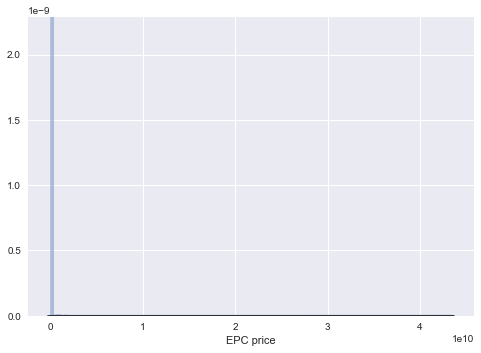

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats
sns.distplot(df['EPC price'].dropna(),hist=True,bins=100,kde=True,fit=stats.gamma)

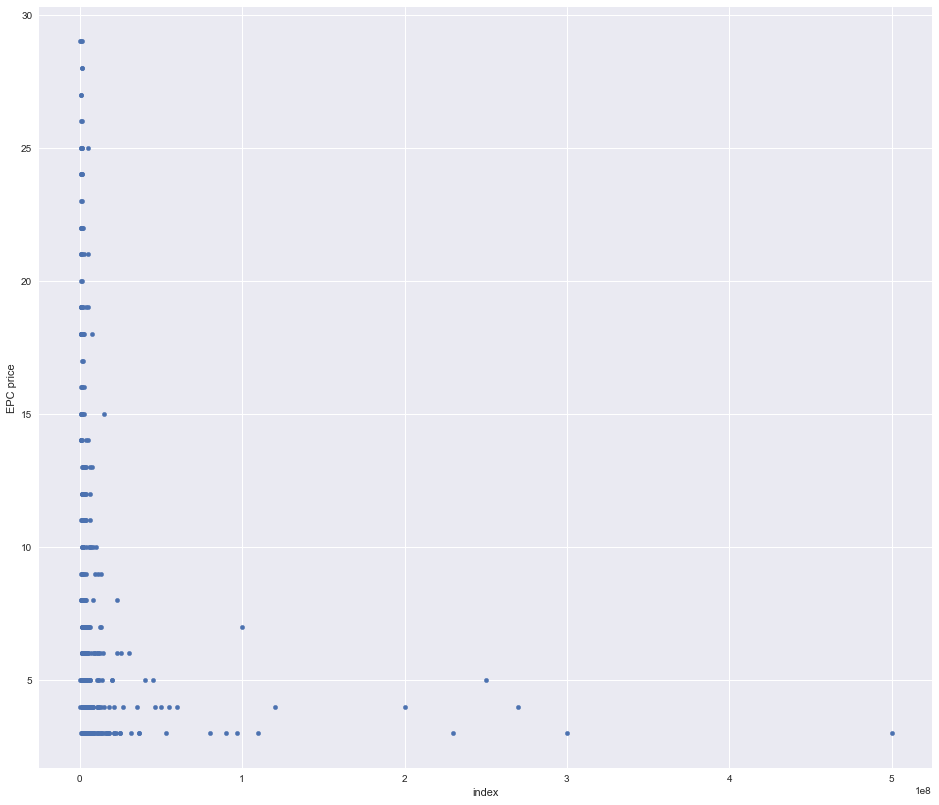

In [128]:
dff2.plot.scatter(x='index', y='EPC price',figsize=(16,14));

In [73]:
min(df["EPC price"].dropna())

8000.0

In [84]:
dff = df["EPC price"].dropna().value_counts().reset_index()

In [101]:
dff1 = dff[dff["EPC price"]>1]

In [92]:
dff.shape

(1388, 2)

In [126]:
dff2 = dff[(dff["EPC price"]>2) & (dff["EPC price"]<30) & (dff["index"]>200)]

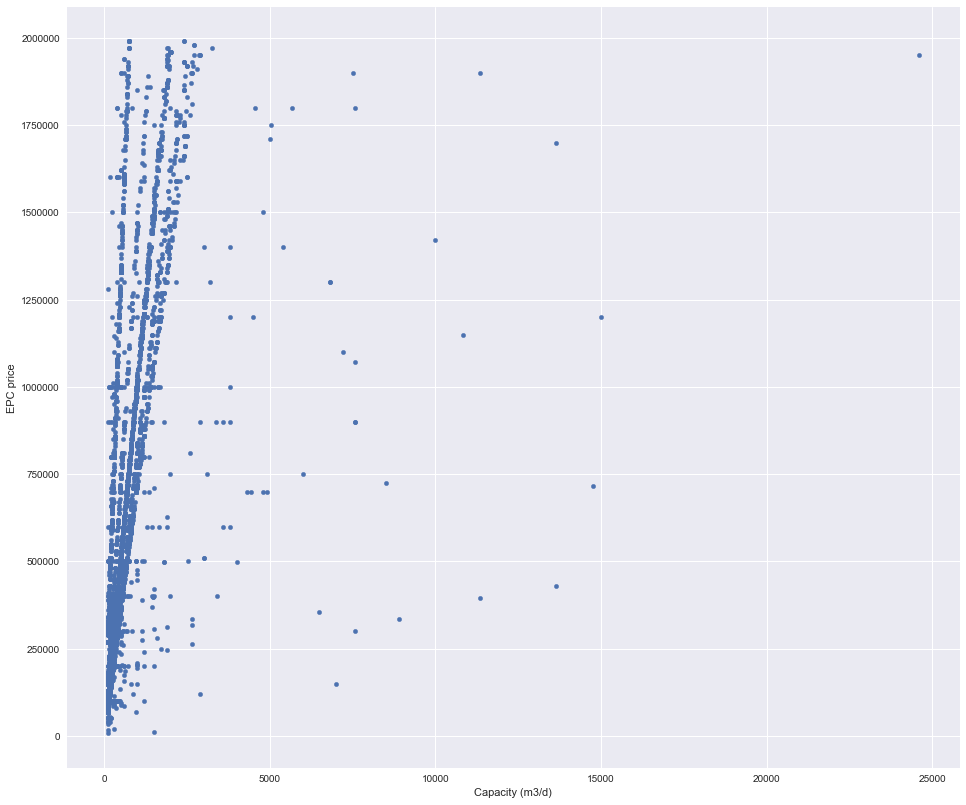

In [139]:
dff3.plot.scatter(x='Capacity (m3/d)', y='EPC price',figsize=(16,14));

In [133]:
df["Capacity (m3/d)"] = df["Capacity (m3/d)"].apply(lambda x: str(x).replace(",",""))

In [134]:
df["Capacity (m3/d)"] = pd.to_numeric(df["Capacity (m3/d)"],errors='coerce')

In [138]:
dff3=df[df["EPC price"]<2000000]

In [148]:
df["EPC price"].describe().reset_index()

,index,EPC price
0,count,9.869000e+03
1,mean,1.398680e+07
2,std,4.428672e+08
3,min,8.000000e+03
4,25%,2.790000e+05
5,50%,7.300000e+05
6,75%,2.410000e+06
7,max,4.350000e+10


In [193]:
df["EPC price"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6        443000000.0
7                NaN
8                NaN
9        270000000.0
10       148000000.0
11       230000000.0
12        98400000.0
13       231000000.0
14               NaN
15       185000000.0
16               NaN
17        15000000.0
18       110000000.0
19       133000000.0
20        55000000.0
21       260000000.0
22        33440000.0
23        68900000.0
24        35030000.0
25               NaN
26               NaN
27        63390000.0
28               NaN
29               NaN
            ...     
19299            NaN
19300       200000.0
19301       200000.0
19302       190000.0
19303       190000.0
19304       480000.0
19305       160000.0
19306       150000.0
19307       140000.0
19308       140000.0
19309       340000.0
19310       320000.0
19311       320000.0
19312       130000.0
19313       100000.0
19314       100000.0
19315       1